# Impact of Proper Score and Ratings on the Borrower APR
## Yosmery Gonzalez

# Introduction
The main purpose of this project is to analyse the factors that contribute to changes on the borrower APR. After a comprenhensive exploratory analysis, the selected variables to be invistgaed are ProsperScore, ProsperRating (Alpha), LoanStatus and loan amount

# Dataset Overview
The Loan Data from Prosper contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower credit history, and the latest payment information

In [124]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [125]:
#load dataset into panda Dataframe
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [126]:
#selected variables for analysis based on the questions to inquiry the dataset
#based on the variable definition and columns wiht less no nulls values
selected_variables=['LoanStatus', 'IsBorrowerHomeowner','IncomeRange', 'EmploymentStatus','ListingCategory (numeric)',
                    'LoanOriginalAmount','BorrowerState','BorrowerAPR','ProsperScore','DebtToIncomeRatio']

s_df=df[selected_variables]
                    
s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanStatus                 113937 non-null  object 
 1   IsBorrowerHomeowner        113937 non-null  bool   
 2   IncomeRange                113937 non-null  object 
 3   EmploymentStatus           111682 non-null  object 
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   LoanOriginalAmount         113937 non-null  int64  
 6   BorrowerState              108422 non-null  object 
 7   BorrowerAPR                113912 non-null  float64
 8   ProsperScore               84853 non-null   float64
 9   DebtToIncomeRatio          105383 non-null  float64
dtypes: bool(1), float64(3), int64(2), object(4)
memory usage: 7.9+ MB


In [127]:
# Set values that are integers and objects
Values_inter= ['ProsperScore','BorrowerAPR','LoanOriginalAmount']
values_obje=['IsBorrowerHomeowner','IncomeRange','BorrowerState']


# Are there relationship across the variables ProsperScore, BorrowerAPR, Loan amount?
### Correlation between relevant variables

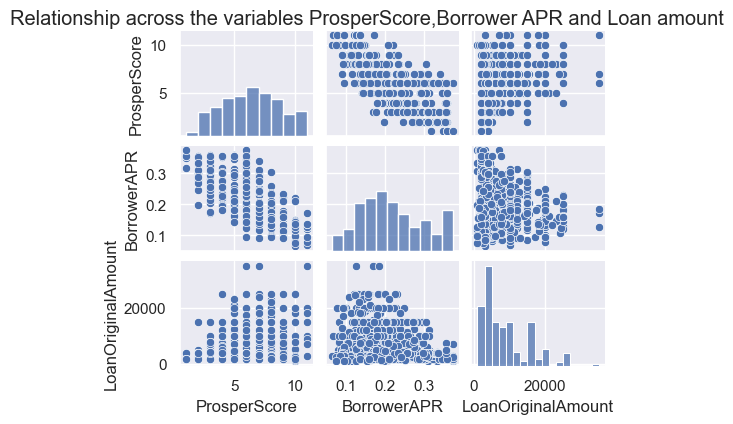

In [137]:
# Correlation between relevant variables- randomsample of 1000 value integer
s_df_sample = s_df.sample(n=500, replace = False)
chart1 = sb.PairGrid(data = s_df_sample, vars = Values_inter)
chart1.map_diag(sb.histplot);
chart1.map_offdiag(sb.scatterplot)
plt.suptitle('Relationship across the variables ProsperScore,Borrower APR and Loan amount')
plt.tight_layout()
chart1.fig.set_size_inches(5,4);

**Observation 1**: There is a negative relationship between Borrower APR and ProsperScore. There is a positive relatioship between Loan Amount increase when ProsperScore increases. No relationship between Borrower APR and Loan Amount. 

# Do the Borrewer APRs change for home owner clients that are full time employed?
### Relationship across BorrowerAPR and homeowership status 


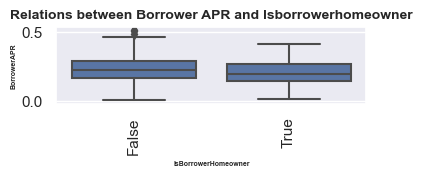

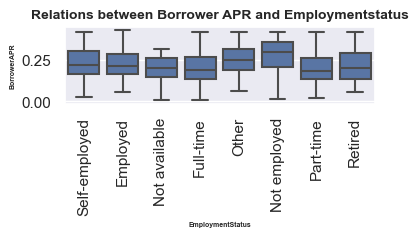

<Figure size 400x100 with 0 Axes>

In [129]:
#  Relationship across BorrowerAPR and homeowership status
def cust_plot(df, xVar):
    plt.title(f'Relations between Borrower APR and {xVar.title()}', fontsize=10, weight='bold')
    plt.xlabel(xVar.title(), fontsize=5, weight='bold')
    plt.ylabel('BorrowerAPR', fontsize=5, weight='bold')
    sb.boxplot(data=df, x=xVar, y='BorrowerAPR', color=sb.color_palette()[0])
    plt.xticks(rotation=90)
    plt.show()

# Example usage
df = s_df  # Replace with your DataFrame
xVar = 'IsBorrowerHomeowner'  # Replace with the column name you want to plot
cust_plot(df, xVar);


def cust_plot2(df, xVar):
    plt.title(f'Relations between Borrower APR and {xVar.title()}', fontsize=10, weight='bold')
    plt.xlabel(xVar.title(), fontsize=5, weight='bold')
    plt.ylabel('BorrowerAPR', fontsize=5, weight='bold')
    sb.boxplot(data=df, x=xVar, y='BorrowerAPR', color=sb.color_palette()[0])
    plt.xticks(rotation=90)
    plt.show()

# Example usage
df = s_df  # Replace with your DataFrame
xVar = 'EmploymentStatus'  # Replace with the column name you want to plot
cust_plot2(df, xVar)
plt.tight_layout()
sb.set(rc={"figure.figsize":(4, 1)}) ;



**Observation 2**: It seems there is relationship between Borrower APR and ProsperRating is negative

# How employment and loans status impact the Borrower Rate?
### Relationship across Employment Status and Borrower APR by Loan Status



In [130]:
top3_categories = ['Completed', 'Current', 'Chargedoff']
s_df= s_df[s_df['LoanStatus'].isin(top3_categories)]
s_df

,LoanStatus,IsBorrowerHomeowner,IncomeRange,EmploymentStatus,ListingCategory (numeric),LoanOriginalAmount,BorrowerState,BorrowerAPR,ProsperScore,DebtToIncomeRatio
0,Completed,True,"$25,000-49,999",Self-employed,0,9425,CO,0.16516,NaN,0.17
1,Current,False,"$50,000-74,999",Employed,2,10000,CO,0.12016,7.0,0.18
2,Completed,False,Not displayed,Not available,0,3001,GA,0.28269,NaN,0.06
3,Current,True,"$25,000-49,999",Employed,16,10000,GA,0.12528,9.0,0.15
4,Current,True,"$100,000+",Employed,2,15000,MN,0.24614,4.0,0.26
...,...,...,...,...,...,...,...,...,...,...
113931,Current,False,"$75,000-99,999",Employed,3,25000,IL,0.15016,6.0,0.28
113932,Current,True,"$50,000-74,999",Employed,1,10000,IL,0.22354,5.0,0.13
113934,Current,True,"$25,000-49,999",Employed,1,10000,TX,0.23984,3.0,0.51
113935,Completed,True,"$25,000-49,999",Full-time,2,15000,GA,0.28408,5.0,0.48


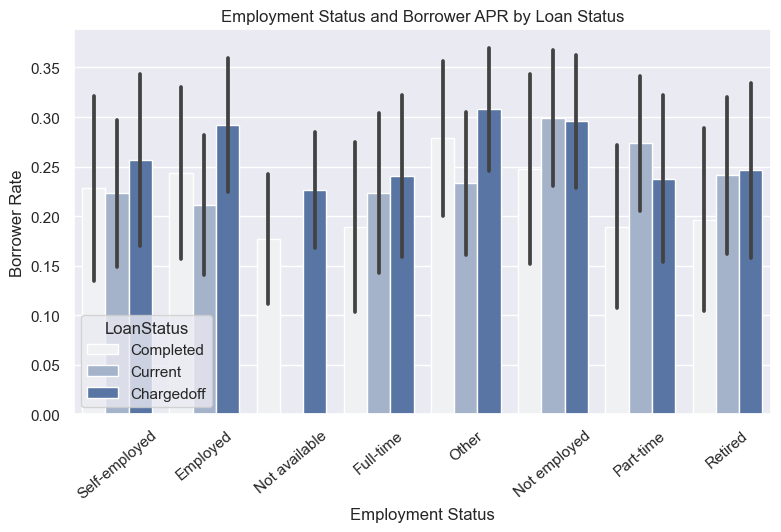

In [131]:
#  Relationship across Rating, Loan Amount and Loan Status

plt.figure(figsize=(9,5)) 
sb.barplot(data=s_df, x='EmploymentStatus', y='BorrowerAPR',
           hue='LoanStatus', errorbar='sd', color=sb.color_palette()[0])

plt.xlabel('Employment Status')
plt.ylabel('Borrower Rate')
plt.title('Employment Status and Borrower APR by Loan Status')
plt.xticks(rotation=40)

plt.show()

**Observation 3**: Full time eployers seems to have lower interest rates for charged off loand than employed borrowers

## Conclusion

Based on the visual analysis and answering the question posted in the introduction  it is concluded that:

Employment status, income, home owner status are variables that appear to impact the loan outcome and Borrower APR. That means that clients that are full time employed, with average incomes and owners of homes are seen to obatianed a higher Proper Score that ultimalety allows then to get a current and completed loan.

It is also noticed that loan amonts are higher when the Proper Score is hig. 

A statistical analysis and modelling is necessary after the Exploratory Data Analysis is underatken to make definitive assertions on the relationhsis and impacts of variables.

In [138]:
!jupyter nbconvert Part_II_slide_deck_Loandata.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck_Loandata.ipynb to slides
[NbConvertApp] Writing 834249 bytes to Part_II_slide_deck_Loandata.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\gonzalezyj\AppData\Local\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\gonzalezyj\AppData\Local\anaconda3\lib\site-packages\jupyter_core\application.py", line 277, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\gonzalezyj\AppData\Local\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\gonzalezyj\AppData\Local\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 423, in start
    self.convert_no